In [52]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb

In [2]:
df = pd.read_csv("Desktop/sales_train_v2.csv")

In [3]:
df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [4]:
df1 = pd.read_csv("Desktop/shops.csv")

In [5]:
df1.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [6]:
df2 = pd.read_csv("Desktop/items (1).csv")

In [7]:
df2.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [8]:
df_test = pd.read_csv("Desktop/test.csv")

In [9]:
df_test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [10]:
df_3 = pd.read_csv("Desktop/item_categories (1).csv")

In [11]:
df_3.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [99]:
df['date'] = pd.to_datetime(df.date,format='%d.%m.%Y')

In [13]:
df.dtypes

date              datetime64[ns]
date_block_num             int64
shop_id                    int64
item_id                    int64
item_price               float64
item_cnt_day             float64
dtype: object

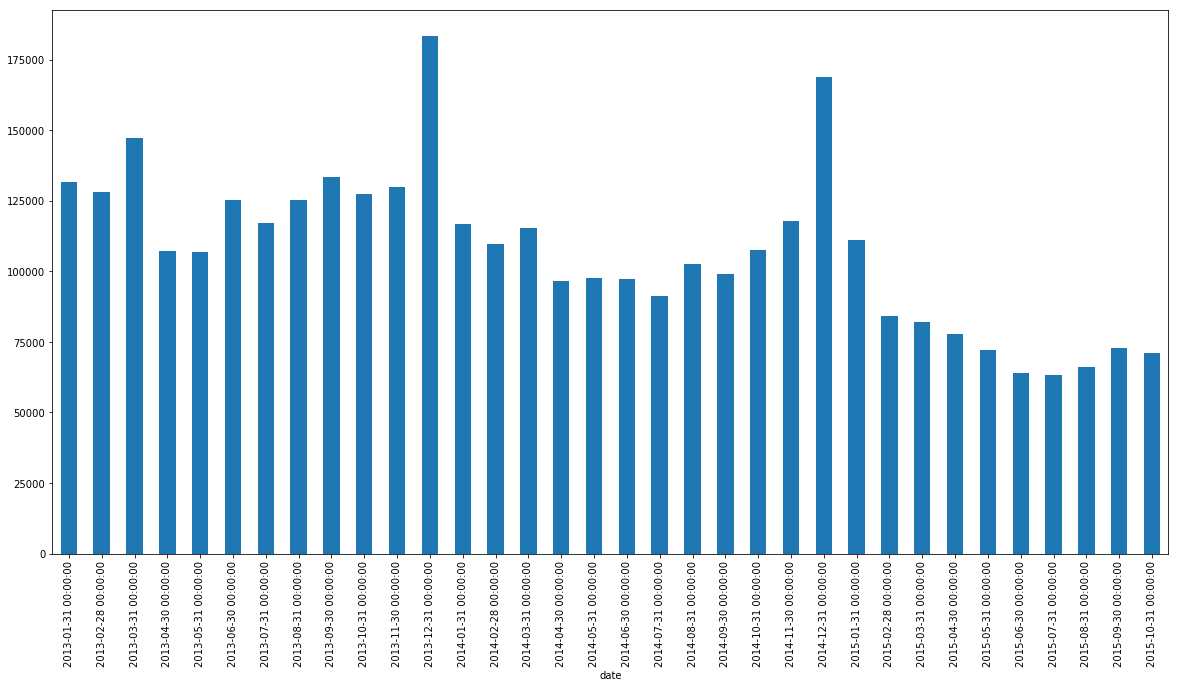

In [17]:
df.copy().set_index('date').item_cnt_day.resample('M').sum().plot(kind ='bar',figsize=(20,10))

In [18]:
plt.style.use('seaborn')

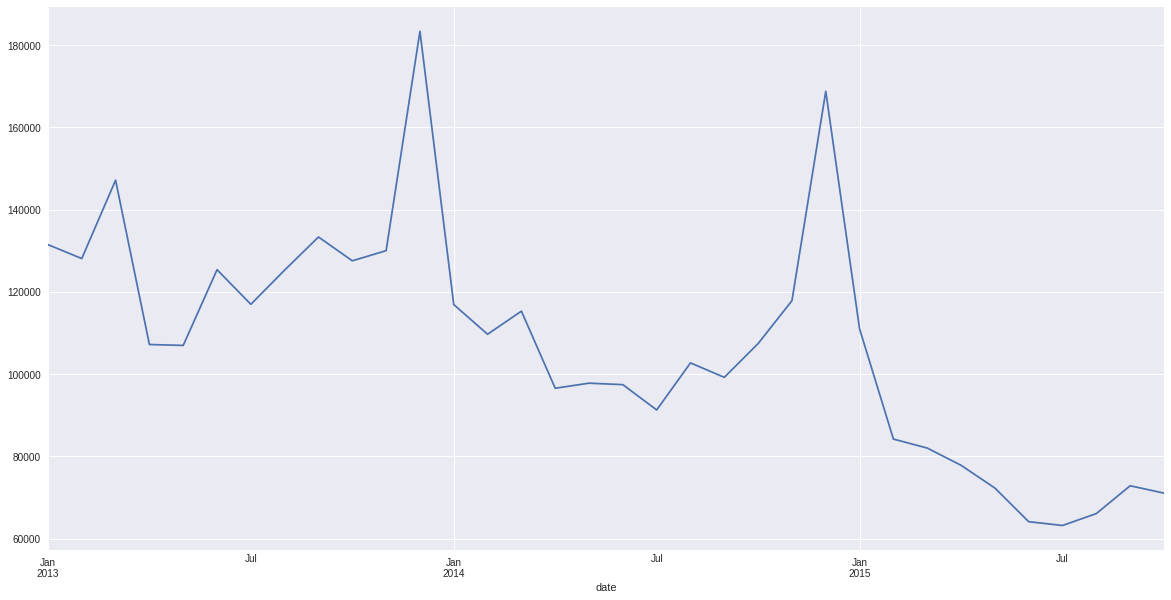

In [19]:
df.copy().set_index('date').item_cnt_day.resample('M').sum().plot(figsize=(20,10))

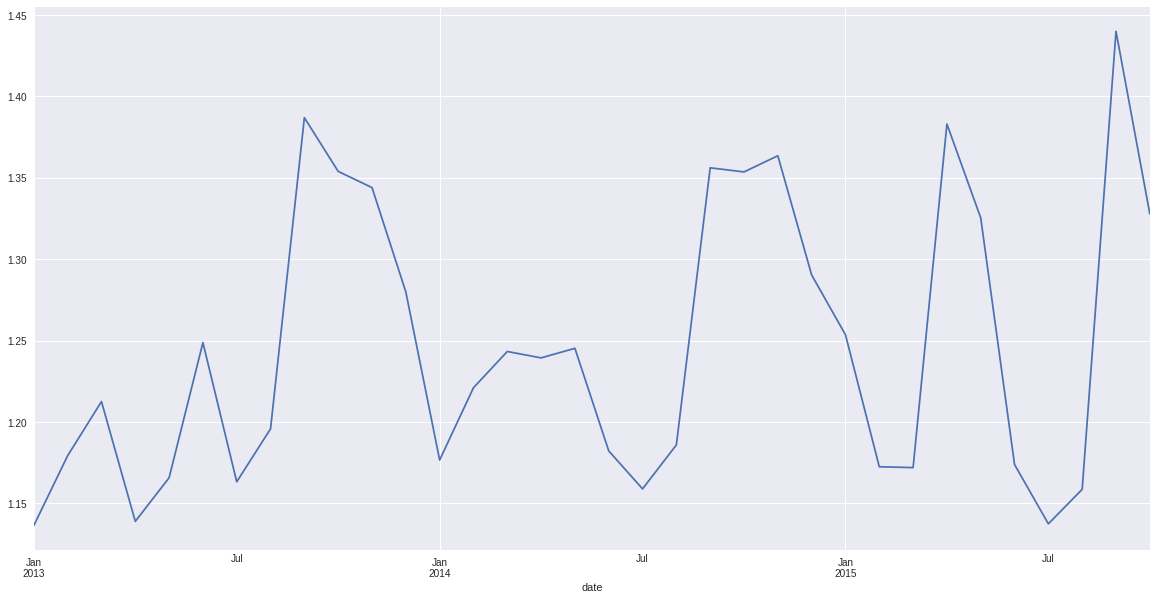

In [20]:
df.copy().set_index('date').item_cnt_day.resample('M').mean().plot(figsize=(20,10))

In [21]:
df.copy().set_index('date').loc[''.item_cnt_day.resample('12M').sum().plot(kind='bar',figsize=(20,10))

SyntaxError: unexpected EOF while parsing (<ipython-input-21-c1b7dd3f2621>, line 1)

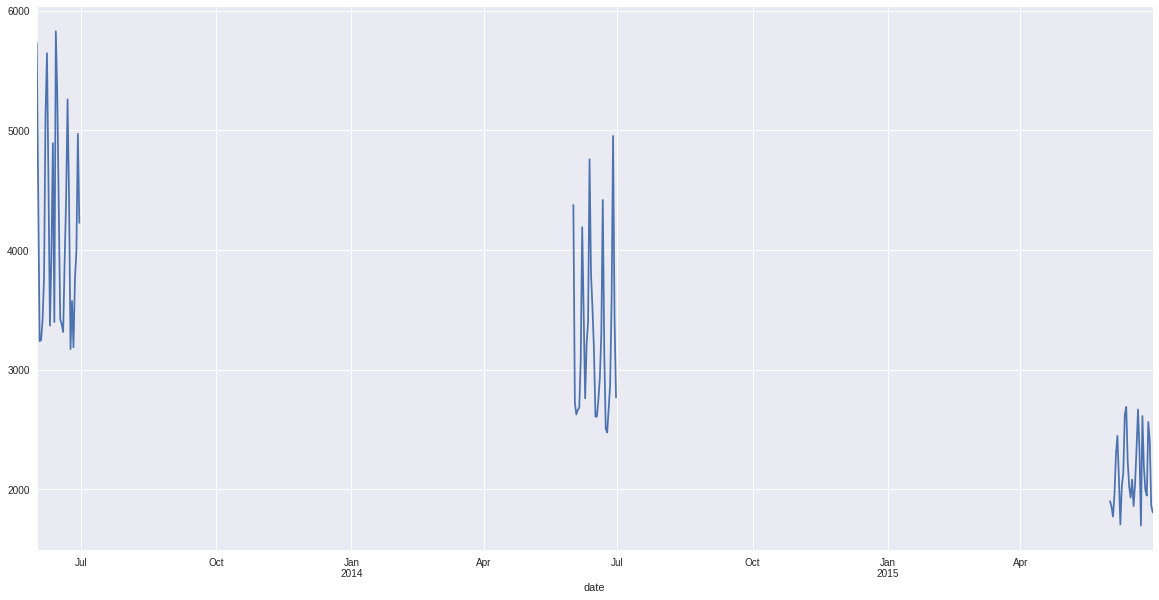

In [22]:
df.loc[df['date'].map(lambda x: x.month)==6].copy().set_index('date').item_cnt_day.resample('D').sum().plot(figsize=(20,10))

In [14]:
df_copy = df.copy().groupby(['shop_id','item_id','date_block_num'],as_index=False).agg({'item_cnt_day':'sum'})

In [15]:
df_copy = df_copy.rename(index=str, columns={"item_cnt_day": "target"})

In [16]:
df_copy2 = df_copy.copy().groupby(['shop_id','date_block_num'],as_index =False).agg({'target':{'shop_block_sum':'sum','shop_block_mean':'mean'}})
df_copy2.columns = [col[0] if col[-1]=='' else col[-1] for col in df_copy2.columns.values]

/home/prasoon/anaconda3/lib/python3.6/site-packages/pandas/core/groupby.py:3961: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [17]:
df_copy_x = pd.merge(df_copy,df_copy2,how = 'left',on = ['shop_id','date_block_num'])

In [18]:
df_copy_x.head()

,shop_id,item_id,date_block_num,target,shop_block_sum,shop_block_mean
0,0,30,1,31.0,6127.0,2.515189
1,0,31,1,11.0,6127.0,2.515189
2,0,32,0,6.0,5578.0,2.338784
3,0,32,1,10.0,6127.0,2.515189
4,0,33,0,3.0,5578.0,2.338784


In [19]:
df_copy3 = df_copy.copy().groupby(['item_id','date_block_num'],as_index =False).agg({'target':{'item_block_sum':'sum','item_block_mean':'mean'}})
df_copy3.columns = [col[0] if col[-1]=='' else col[-1] for col in df_copy3.columns.values]

/home/prasoon/anaconda3/lib/python3.6/site-packages/pandas/core/groupby.py:3961: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [20]:
df_copy3.head()

,item_id,date_block_num,item_block_sum,item_block_mean
0,0,20,1.0,1.0
1,1,15,2.0,2.0
2,1,18,1.0,1.0
3,1,19,1.0,1.0
4,1,20,1.0,1.0


In [21]:
df_copy_x = pd.merge(df_copy_x,df_copy3,how = 'left',on = ['item_id','date_block_num'])

In [22]:
df_copy_x.head()

,shop_id,item_id,date_block_num,target,shop_block_sum,shop_block_mean,item_block_sum,item_block_mean
0,0,30,1,31.0,6127.0,2.515189,861.0,19.133333
1,0,31,1,11.0,6127.0,2.515189,628.0,13.652174
2,0,32,0,6.0,5578.0,2.338784,299.0,8.081081
3,0,32,1,10.0,6127.0,2.515189,208.0,5.621622
4,0,33,0,3.0,5578.0,2.338784,61.0,2.033333


In [23]:
df_copy_x = df_copy_x.sort_values('date_block_num')

In [24]:
df_copy_x.head()

,shop_id,item_id,date_block_num,target,shop_block_sum,shop_block_mean,item_block_sum,item_block_mean
560419,25,18821,0,2.0,8215.0,2.618744,9.0,1.285714
508826,25,6235,0,1.0,8215.0,2.618744,1.0,1.000000
63942,4,21876,0,1.0,2114.0,1.990584,30.0,1.500000
1271613,51,991,0,1.0,2748.0,1.792564,31.0,1.631579
508864,25,6241,0,-1.0,8215.0,2.618744,-1.0,-1.000000


In [25]:
df_copy_x.head()

,shop_id,item_id,date_block_num,target,shop_block_sum,shop_block_mean,item_block_sum,item_block_mean
560419,25,18821,0,2.0,8215.0,2.618744,9.0,1.285714
508826,25,6235,0,1.0,8215.0,2.618744,1.0,1.000000
63942,4,21876,0,1.0,2114.0,1.990584,30.0,1.500000
1271613,51,991,0,1.0,2748.0,1.792564,31.0,1.631579
508864,25,6241,0,-1.0,8215.0,2.618744,-1.0,-1.000000


In [74]:
l = []
for a in df_copy_x['date_block_num'].unique():
    l.append(df_copy_x.loc[df_copy_x['date_block_num']==a,'date_block_num'].count())

In [76]:
l

[63224,
 59935,
 63977,
 54638,
 53296,
 56196,
 58035,
 58022,
 51575,
 51090,
 51460,
 66276,
 53320,
 47704,
 49291,
 44740,
 45766,
 46481,
 45756,
 46439,
 40423,
 42595,
 45755,
 59275,
 46775,
 41390,
 40464,
 32875,
 32220,
 31909,
 33527,
 33486,
 29678,
 31531]

In [359]:
for group,frame in df_copy_x.copy().gropby('date_block_num'):
    

34

In [384]:
df_copy_x=df_copy_x.drop(['level_0','index'],axis=1)

In [26]:
for block in df_copy_x['date_block_num'].unique():
    l = len(df_copy_x.loc[df_copy_x['date_block_num']==block,'date_block_num'])
    df_copy_x = df_copy_x.reset_index(drop=True)
    df_copy_x=df_copy_x.drop(df_copy_x.index[29678*(block+1):(29678*block)+l])
    

In [30]:
df_copy_x.loc[df_copy_x['date_block_num']==33].count()

shop_id            29678
item_id            29678
date_block_num     29678
target             29678
shop_block_sum     29678
shop_block_mean    29678
item_block_sum     29678
item_block_mean    29678
dtype: int64

In [32]:
df_copy_x.head()

,shop_id,item_id,date_block_num,target,shop_block_sum,shop_block_mean,item_block_sum,item_block_mean
0,25,18821,0,2.0,8215.0,2.618744,9.0,1.285714
1,25,6235,0,1.0,8215.0,2.618744,1.0,1.000000
2,4,21876,0,1.0,2114.0,1.990584,30.0,1.500000
3,51,991,0,1.0,2748.0,1.792564,31.0,1.631579
4,25,6241,0,-1.0,8215.0,2.618744,-1.0,-1.000000


In [39]:
m = 29678
df_copy_x['shop_sum_lag_1'] = df_copy_x['shop_block_sum'].shift(1*m)
df_copy_x['shop_sum_lag_3'] = df_copy_x['shop_block_sum'].shift(3*m)
df_copy_x['shop_sum_lag_6'] = df_copy_x['shop_block_sum'].shift(6*m)
df_copy_x['item_sum_lag_1'] = df_copy_x['item_block_sum'].shift(1*m)
df_copy_x['item_sum_lag_3'] = df_copy_x['item_block_sum'].shift(3*m)
df_copy_x['item_sum_lag_6'] = df_copy_x['item_block_sum'].shift(6*m)
df_copy_x['shop_mean_lag_1'] = df_copy_x['shop_block_mean'].shift(1*m)
df_copy_x['shop_mean_lag_3'] = df_copy_x['shop_block_mean'].shift(3*m)
df_copy_x['shop_mean_lag_6'] = df_copy_x['shop_block_mean'].shift(6*m)
df_copy_x['item_mean_lag_1'] = df_copy_x['item_block_mean'].shift(1*m)
df_copy_x['item_mean_lag_3'] = df_copy_x['item_block_mean'].shift(3*m)
df_copy_x['item_mean_lag_6'] = df_copy_x['item_block_mean'].shift(6*m)
df_copy_x['target_lag_1'] = df_copy_x['target'].shift(1*m)
df_copy_x['target_lag_3'] = df_copy_x['target'].shift(3*m)
df_copy_x['target_lag_6'] = df_copy_x['target'].shift(6*m)









In [45]:
df_copy_x.head()

,shop_id,item_id,date_block_num,target,shop_block_sum,shop_block_mean,item_block_sum,item_block_mean,shop_sum_lag_1,shop_sum_lag_3,...,item_sum_lag_6,shop_mean_lag_1,shop_mean_lag_3,shop_mean_lag_6,item_mean_lag_1,item_mean_lag_3,item_mean_lag_6,target_lag_1,target_lag_3,target_lag_6
0,25,18821,0,2.0,8215.0,2.618744,9.0,1.285714,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,6235,0,1.0,8215.0,2.618744,1.0,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,21876,0,1.0,2114.0,1.990584,30.0,1.500000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,51,991,0,1.0,2748.0,1.792564,31.0,1.631579,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,25,6241,0,-1.0,8215.0,2.618744,-1.0,-1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
df_123 = df_copy_x.copy().dropna()

In [44]:
df_123.head()

,shop_id,item_id,date_block_num,target,shop_block_sum,shop_block_mean,item_block_sum,item_block_mean,shop_sum_lag_1,shop_sum_lag_3,...,item_sum_lag_6,shop_mean_lag_1,shop_mean_lag_3,shop_mean_lag_6,item_mean_lag_1,item_mean_lag_3,item_mean_lag_6,target_lag_1,target_lag_3,target_lag_6
178068,4,13102,6,2.0,1378.0,1.654262,33.0,1.375000,3847.0,1375.0,...,9.0,2.216014,1.781088,2.618744,1.200000,1.192308,1.285714,1.0,1.0,2.0
178069,21,5273,6,1.0,1860.0,1.580289,22.0,1.466667,3847.0,1388.0,...,1.0,2.216014,1.726368,2.618744,5.555556,1.200000,1.000000,4.0,1.0,1.0
178070,16,17865,6,1.0,2898.0,1.837666,40.0,1.538462,3847.0,2168.0,...,30.0,2.216014,1.970909,1.990584,1.000000,2.972222,1.500000,1.0,1.0,1.0
178071,15,8195,6,2.0,2599.0,2.040031,16.0,1.230769,1785.0,1628.0,...,31.0,2.003367,1.534402,1.792564,1.000000,1.000000,1.631579,1.0,1.0,1.0
178072,16,3624,6,1.0,2898.0,1.837666,35.0,1.400000,1539.0,3978.0,...,-1.0,1.923750,2.098101,2.618744,3.277778,1.333333,-1.000000,1.0,2.0,-1.0


In [77]:
X = df_copy_x.copy().drop('target',axis = 1)
y  = df_copy_x.copy().loc[:,'target']

In [78]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [79]:
d_train = lgb.Dataset(x_train, label=y_train)

In [93]:
params = {}
params['learning_rate'] = 0.03
params['boosting_type'] = 'gbdt'
params['objective'] = 'regression'
params['metric'] = 'mse'


In [94]:
clf = lgb.train(params, d_train, 100)

In [95]:
y_pred=clf.predict(x_test)

In [96]:
from sklearn.metrics import r2_score
accuracy=r2_score(y_test,y_pred)

In [97]:
accuracy

0.8029405033520848

In [98]:
y_pred

array([ 1.22103679,  1.77415747,  1.2053501 , ...,  3.20605224,
        1.73560381, 13.42816779])